In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
from model import color_gan
from model.unet import GrayLayer

In [2]:
image_paths = ['test_images/201%s.jpg' % x for x in [2,3,4]]

In [3]:
crop = transforms.RandomCrop([256, 256])
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

In [4]:
images = [Image.open(p) for p in image_paths]

In [57]:
image_ = images[0]

In [58]:
crop_images = crop(image_)

In [59]:
crop_images.size

(256, 256)

In [60]:
image_tensor = to_tensor(crop_images)

In [61]:
image_tensor.size()

torch.Size([3, 256, 256])

In [62]:
image_var = Variable(image_tensor)
image_var = image_var.unsqueeze(0)

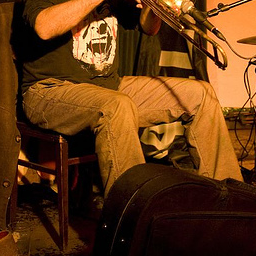

In [63]:
to_pil(image_var.squeeze(0).data)    

In [47]:
import collections
Opt = collections.namedtuple('Opt', 'train, gpu')
opt = Opt(
    train=False,
    gpu=False
)

In [48]:
model = color_gan.ColorGAN(opt)

init network


In [49]:
model.load_state_dict('model_params/generator_cpu_params_499.pth')

Load State Dict finished


In [64]:
image_var.size()

torch.Size([1, 3, 256, 256])

In [65]:
gray_layer = GrayLayer(use_cuda=False)

In [66]:
gray_var = gray_layer(image_var)

In [ ]:
result = model.inference(gray_var)

In [ ]:
result.size()

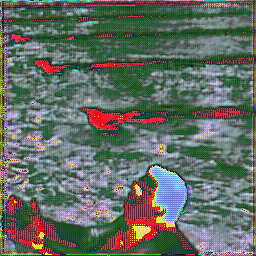

In [55]:
to_pil(result.squeeze(0).data)    

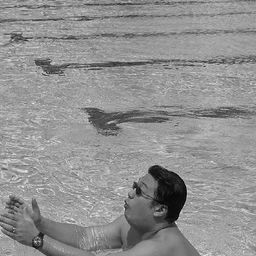

In [56]:
to_pil(gray_var[0].data)